In [1]:
from main_hpo import HPO_SIM
from grasp_core import GRASP_HPO

from sklearn.datasets import load_breast_cancer, load_digits

from queue import PriorityQueue
import pandas as pd
import matplotlib as plt

In [2]:
sim = HPO_SIM()
sim.prepare_dataset(load_breast_cancer())

In [3]:
hp_ranges = {
    'n_estimators': (50, 500),
    'max_depth': (3, 10),
    'colsample_bytree': (0.5, 1),
    'reg_lambda': (0.01, 1.0),
    'subsample': (0.5, 1.0)
}

ghpo = GRASP_HPO(sim.evaluate_solution)
ghpo.configure_ranges(hp_ranges)

In [4]:
pq = ghpo.get_intermediate()
after_phase_1 = []
for combo in pq.queue: after_phase_1.append(combo[0])
inputs = pd.DataFrame({'score': after_phase_1})
inputs
# list of different HP configuration k-fold scores in priority queue FROM BUILD PHASE

,score
0,0.960488
1,0.960526


In [5]:
# achieved best score from build phase
to_improve = max(after_phase_1)
to_improve

0.9605258924417214

In [11]:
# duplicate output from phase 1 to test on 4 gen_neighbor functions
combo1 = PriorityQueue()
for c in pq.queue: combo1.put(c)

combo2 = PriorityQueue()
for c in pq.queue: combo2.put(c)

combo3 = PriorityQueue()
for c in pq.queue: combo3.put(c)

combo4 = PriorityQueue()
for c in pq.queue: combo4.put(c)

In [12]:
after_phase_2 = {}
# test each function and save k-fold mean score

score, solution = ghpo.tune_intermediate(combo1)
after_phase_2['fn0'] = [score]
ghpo.cycle_gen_n()

score, solution = ghpo.tune_intermediate(combo2)
after_phase_2['fn1'] = [score]
ghpo.cycle_gen_n()

score, solution = ghpo.tune_intermediate(combo3)
after_phase_2['fn2'] = [score]
ghpo.cycle_gen_n()

score, solution = ghpo.tune_intermediate(combo4)
after_phase_2['fn3'] = [score]
ghpo.cycle_gen_n()

local search set to use fn 1: tweak all HPs
local search set to use fn 2: reinitialize random set of HP
local search set to use fn 3: tweak random set of HP
local search set to use fn 0: reinitialize one random HP


In [13]:
outputs = pd.DataFrame(after_phase_2, index=['score'])
outputs = pd.melt(outputs)

dif = [score - to_improve for score in outputs.loc[:,'value']]
outputs['inc'] = dif
outputs
# inc column is change in score after local search phase

,variable,value,inc
0,fn0,0.966994,0.006468
1,fn1,0.964873,0.004347
2,fn2,0.962717,0.002191
3,fn3,0.964873,0.004347


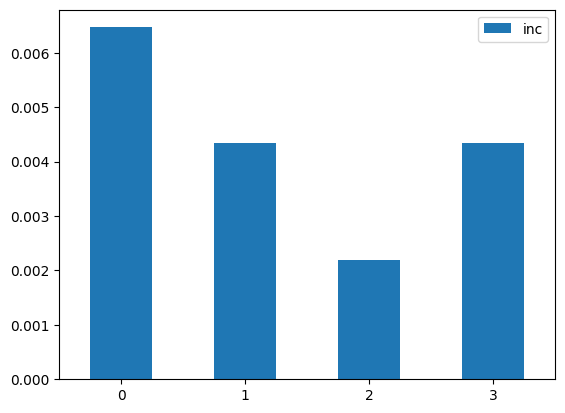

In [14]:
ax = outputs.plot.bar(y='inc', rot=0)